<a href="https://colab.research.google.com/github/ragaashritha/Project-6/blob/master/Assignment_6B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 2s 0us/step


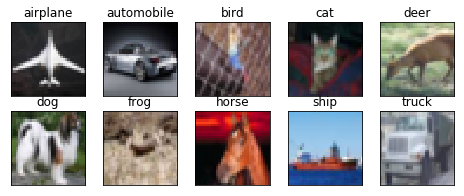

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
num_classes

10

In [0]:
# Shared Input Layer
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D,SeparableConv2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate


In [0]:
#input layer
Input_layer = Input(shape = (32,32,3)) 

#Normal convolution
normal_convolution = Convolution2D(32,kernel_size = 3,activation = 'relu')(Input_layer)#30x30x32

#Spatially seperable convolution(1x3)
seperable_1_convolution = Convolution2D(64,kernel_size = (1,3),activation = 'relu')(normal_convolution)#30x28x64
#Spatially seperable convolution(3x1)
seperable_2_convolution = Convolution2D(64,kernel_size = (3,1), activation = 'relu')(seperable_1_convolution)#28x28x64


#Depth wise seperable convolution
depth_wise = SeparableConv2D(96,3,3,activation = 'relu')(seperable_2_convolution)#26x26x96

depth_wise = Dropout((0.2))(depth_wise)
#
conv1 = Convolution2D(32, kernel_size = (1,1),activation = 'relu')(depth_wise)


#Grouped convolution - 1
grouped_1 = Convolution2D(64,3,3,border_mode='same',activation = 'relu')(conv1)
grouped_2 = Convolution2D(64,5,5,border_mode='same',activation = 'relu')(conv1)
grouped_3 = concatenate([grouped_1, grouped_2])

grouped_3 = Dropout((0.2))(grouped_3)
#
conv2 = Convolution2D(32, kernel_size = (1,1),activation = 'relu')(grouped_3)


#Grouped convolution - 2
grouped_1 = Convolution2D(64,3,3,border_mode='same',activation = 'relu',dilation_rate = 1)(conv2)
grouped_2 = Convolution2D(64,5,5,border_mode='same',activation = 'relu',dilation_rate = 2)(conv2)
grouped_3 = concatenate([grouped_1, grouped_2])


#Dense
conv3 = Convolution2D(16,1,1,activation = 'relu')(grouped_3)
conv = Convolution2D(10,26,26)(conv3)
conv = Flatten()(conv)
output = Dense(10,activation = 'softmax')(conv)

model = Model(inputs=Input_layer, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model)




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(96, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", dilation_rate=1, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu", dilation_rate=2, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykern

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_115 (Conv2D)             (None, 30, 30, 32)   896         input_17[0][0]                   
__________________________________________________________________________________________________
conv2d_116 (Conv2D)             (None, 30, 28, 64)   6208        conv2d_115[0][0]                 
__________________________________________________________________________________________________
conv2d_117 (Conv2D)             (None, 28, 28, 64)   12352       conv2d_116[0][0]                 
__________________________________________________________________________________________________
separable_

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=333, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
333/333 [==============================] - 31s 92ms/step - loss: 1.8204 - acc: 0.3238 - val_loss: 1.6638 - val_acc: 0.3871
Epoch 2/50
333/333 [==============================] - 29s 86ms/step - loss: 1.3818 - acc: 0.4980 - val_loss: 1.3809 - val_acc: 0.5087
Epoch 3/50
333/333 [==============================] - 28s 85ms/step - loss: 1.1953 - acc: 0.5724 - val_loss: 1.1594 - val_acc: 0.5923
Epoch 4/50
333/333 [==============================] - 28s 85ms/step - loss: 1.0609 - acc: 0.6208 - val_loss: 1.0460 - val_acc: 0.6263
Epoch 5/50
333/333 [==============================] - 29s 86ms/step - loss: 0.9737 - acc: 0.6531 - val_loss: 0.9824 - val_acc: 0.6552
Epoch 6/50
333/333 [==============================] - 28s 85ms/step - loss: 0.9004 - acc: 0.6793 - val_loss: 0.9586 - val_acc: 0.6663
Epoch 7/50
333/333 [==============================] - 28s 85ms/step - loss: 0.8341 - acc: 0.7033 - val_loss: 0.9156 - val_acc: 0.6878
Epoch 8/50
333/333 [==============================] - 28s 86ms

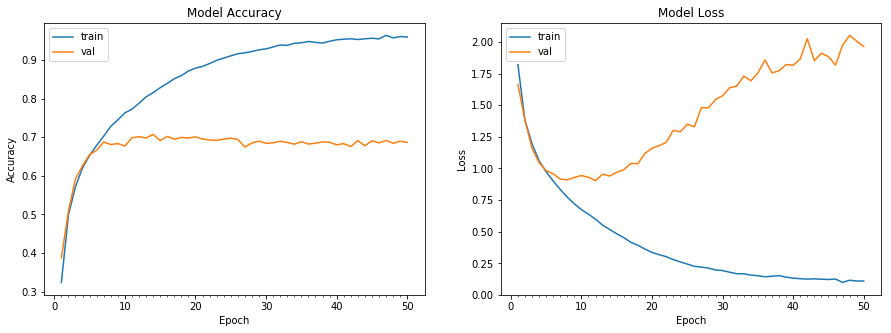

Accuracy on test data is: 68.69


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 150),
                                 samples_per_epoch = train_features.shape[0], nb_epoch =50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))


In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #RF- 3x3, o/p - 32x32x48
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3)) #RF - 5x5, o/p - 30x30x48
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #RF - 10x10, o/p - 15x15x48
model.add(Dropout(0.25))

model.add(Convolution2D(96, 3, 3, border_mode='same'))#RF - 12x12, o/p - 15x15x96 
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))#RF - 14x14, o/p - 13x13x96
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))#RF - 28x28 ,o/p - 6x6x96
model.add(Dropout(0.25))

model.add(Convolution2D(192, 3, 3, border_mode='same'))#RF - 30x30, o/p -  6x6x192
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))#RF - 32x32 ,o/p - 4x4x192
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))#RF - 32x32, o/p - 2x2x192
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipyke

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


Epoch 1/100
390/390 [==============================] - 15s 38ms/step - loss: 1.8509 - acc: 0.2920 - val_loss: 1.4891 - val_acc: 0.4550
Epoch 2/100
390/390 [==============================] - 9s 23ms/step - loss: 1.3374 - acc: 0.5155 - val_loss: 1.1070 - val_acc: 0.6013
Epoch 3/100
390/390 [==============================] - 9s 22ms/step - loss: 1.1082 - acc: 0.6053 - val_loss: 0.9527 - val_acc: 0.6548
Epoch 4/100
390/390 [==============================] - 9s 22ms/step - loss: 0.9717 - acc: 0.6595 - val_loss: 0.8679 - val_acc: 0.6943
Epoch 5/100
390/390 [==============================] - 9s 22ms/step - loss: 0.8728 - acc: 0.6966 - val_loss: 0.7766 - val_acc: 0.7312
Epoch 6/100
390/390 [==============================] - 9s 22ms/step - loss: 0.8038 - acc: 0.7231 - val_loss: 0.7153 - val_acc: 0.7534
Epoch 7/100
390/390 [==============================] - 9s 22ms/step - loss: 0.7415 - acc: 0.7471 - val_loss: 0.7111 - val_acc: 0.7571
Epoch 8/100
390/390 [==============================] - 9s 22m

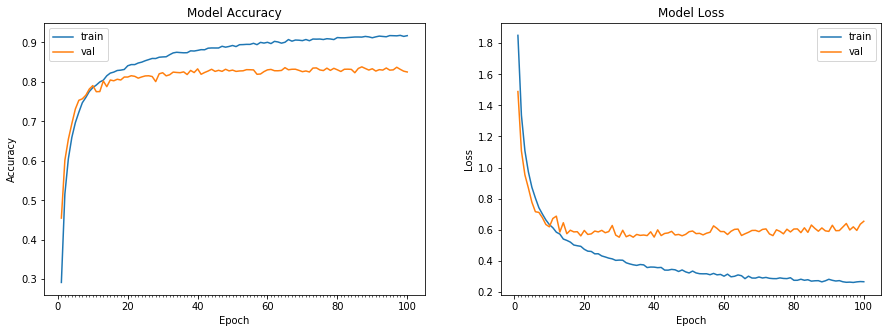

Accuracy on test data is: 82.51


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch =100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# Define the model
model = Sequential()

model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #RF- 3x3, o/p - 32x32x48
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(48, 3, 3,border_mode='same')) #RF - 5x5, o/p - 32x32x48
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) #RF - 10x10, o/p - 16x16x48
model.add(Dropout(0.25))

model.add(Convolution2D(96, 3, 3, border_mode='same'))#RF - 12x12, o/p - 16x16x96 
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(96, 3, 3,border_mode='same'))#RF - 14x14, o/p - 16x16x96
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))#RF - 28x28 ,o/p - 8x8x96
model.add(Dropout(0.25))

model.add(Convolution2D(192, 3, 3, border_mode='same'))#RF - 30x30, o/p -  8x8x192
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Convolution2D(192, 3, 3,border_mode='same'))#RF - 32x32 ,o/p - 8x8x192
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Convolution2D(10,1,1))
model.add(Convolution2D(10,8,8))
model.add(Flatten())

model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/pyth

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_41 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 32, 32, 48)        20784     
_________________________________________________________________
activation_42 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 48)        0         
__________

In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 138),
                                 samples_per_epoch = train_features.shape[0], nb_epoch =75, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=362, epochs=75)`
  if sys.path[0] == '':


Epoch 1/75
362/362 [==============================] - 16s 44ms/step - loss: 1.5184 - acc: 0.4755 - val_loss: 1.5897 - val_acc: 0.4876
Epoch 2/75
362/362 [==============================] - 13s 37ms/step - loss: 0.9646 - acc: 0.6560 - val_loss: 0.9921 - val_acc: 0.6672
Epoch 3/75
362/362 [==============================] - 13s 37ms/step - loss: 0.7557 - acc: 0.7317 - val_loss: 0.8595 - val_acc: 0.7069
Epoch 4/75
362/362 [==============================] - 13s 36ms/step - loss: 0.6453 - acc: 0.7722 - val_loss: 0.6898 - val_acc: 0.7662
Epoch 5/75
362/362 [==============================] - 13s 36ms/step - loss: 0.5608 - acc: 0.8015 - val_loss: 0.6318 - val_acc: 0.7827
Epoch 6/75
362/362 [==============================] - 13s 36ms/step - loss: 0.5001 - acc: 0.8250 - val_loss: 0.6636 - val_acc: 0.7719
Epoch 7/75
362/362 [==============================] - 13s 36ms/step - loss: 0.4432 - acc: 0.8430 - val_loss: 0.6307 - val_acc: 0.7913
Epoch 8/75
362/362 [==============================] - 13s 36ms

KeyboardInterrupt: ignored